## Первая часть

In [1]:
!pip install pandas

In [2]:
import pandas as pd
path='/content/train.csv'

In [3]:
df=pd.read_csv(path, index_col='PassengerId')
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
survival_rates = df.groupby('Pclass')['Survived'].mean() * 100
print(f"\nПроцент выживаемости по классам:")
print(survival_rates)


Процент выживаемости по классам:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [9]:
def extract_name(name):
    return name.split(',')[1].split('.')[1].strip()

df['First_Name'] = df['Name'].apply(extract_name)

female_names = df[df['Sex'] == 'female']['First_Name']
male_names = df[df['Sex'] == 'male']['First_Name']

popular_female_name = female_names.value_counts().idxmax()
popular_male_name = male_names.value_counts().idxmax()

print(f"\nСамое популярное женское имя: {popular_female_name}")
print(f"Самое популярное мужское имя: {popular_male_name}")


Самое популярное женское имя: Mary
Самое популярное мужское имя: John


In [10]:
for pclass in df['Pclass'].unique():
    subset = df[df['Pclass'] == pclass]

    female_names_pclass = subset[subset['Sex'] == 'female']['First_Name']
    male_names_pclass = subset[subset['Sex'] == 'male']['First_Name']

    popular_female_name_pclass = female_names_pclass.value_counts().idxmax()
    popular_male_name_pclass = male_names_pclass.value_counts().idxmax()

    print(f"\nКласс {pclass}:")
    print(f"Самое популярное женское имя: {popular_female_name_pclass}")
    print(f"Самое популярное мужское имя: {popular_male_name_pclass}")


Класс 3:
Самое популярное женское имя: Mary
Самое популярное мужское имя: James

Класс 1:
Самое популярное женское имя: John Bradley (Florence Briggs Thayer)
Самое популярное мужское имя: Charles H

Класс 2:
Самое популярное женское имя: Bertha
Самое популярное мужское имя: William John


In [11]:
print("Пассажиры от 44 лет и старше")
df[df['Age'] >= 44].head()

Пассажиры от 44 лет и старше


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name
PassengerId,,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Timothy J
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Elizabeth
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,(Mary D Kingcome)
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,Edward H
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,Henry Sleeper (Myna Haxtun)


In [12]:
print("число пассажиров старше 44 лет или равное 44 годам")
df[df['Age'] >= 44].count().max()

число пассажиров старше 44 лет или равное 44 годам


124

In [13]:
print("Пассажиры младше 44 лет и мужского пола:")
df[(df['Age'] < 44) & (df['Sex'] == 'male')].count().max()


Пассажиры младше 44 лет и мужского пола:


368

In [14]:
df2=df.groupby('Cabin')
print('число кабин')
len(df2.groups)

число кабин


147

## Вторая часть

In [15]:
!pip install matplotlib

In [16]:
!pip install seaborn

In [17]:
!pip install plotly

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [21]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen Harris
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John Bradley (Florence Briggs Thayer)
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina


Text(0.5, 0, 'Parch')

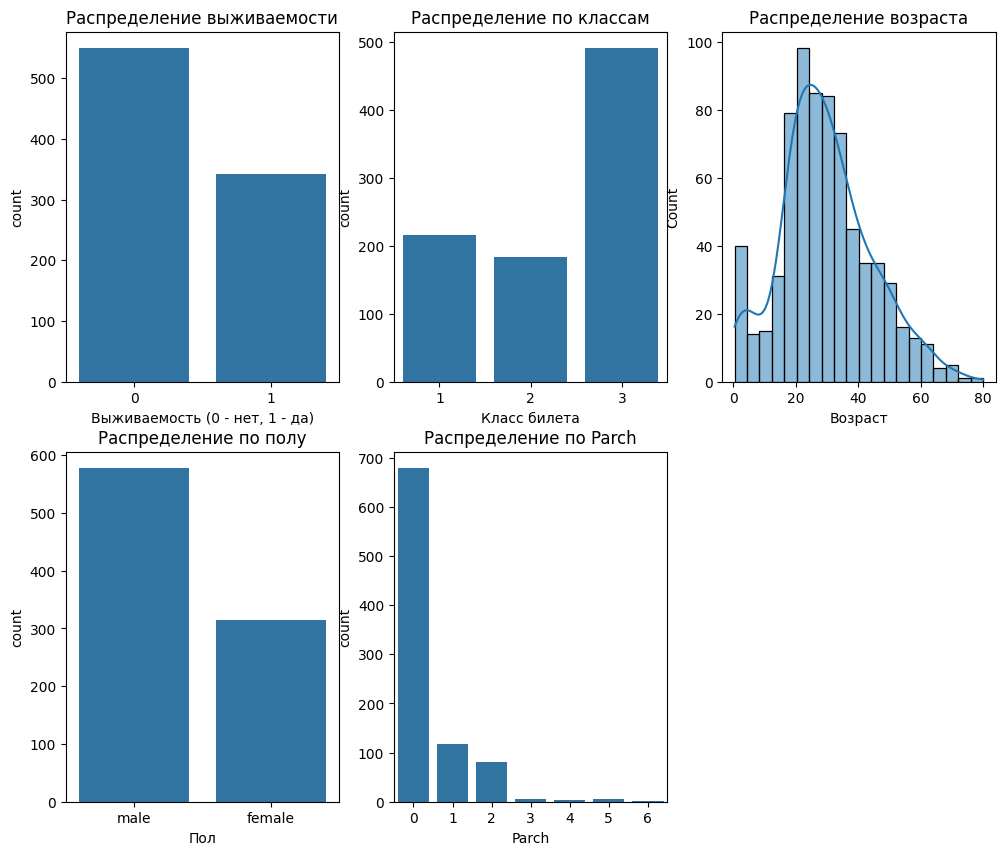

In [20]:
# 2. Визуализация распределений
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('Распределение выживаемости')
plt.xlabel('Выживаемость (0 - нет, 1 - да)')

plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', data=df)
plt.title('Распределение по классам')
plt.xlabel('Класс билета')

plt.subplot(2, 3, 3)
sns.histplot(x='Age', data=df, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')

plt.subplot(2, 3, 4)
sns.countplot(x='Sex', data=df)
plt.title('Распределение по полу')
plt.xlabel('Пол')

plt.subplot(2, 3, 5)
sns.countplot(x='Parch', data=df)
plt.title('Распределение по Parch')
plt.xlabel('Parch')

Text(0.5, 0, 'Возраст')

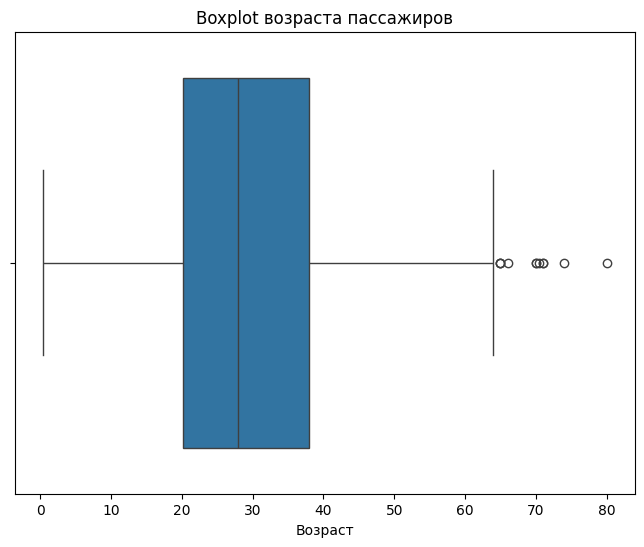

In [22]:
# 3. Boxplot для возраста
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot возраста пассажиров')
plt.xlabel('Возраст')

# Интерпретация:
# На графике видно, что медиана возраста находится примерно на 28-29 лет
# Выявлено несколько выбросов (outliers) в области возраста выше 70 лет
# Квартили показывают, что 50% пассажиров находятся в возрастном диапазоне от 20 до 38 лет


Text(0.5, 1.0, 'Распределение по классам')

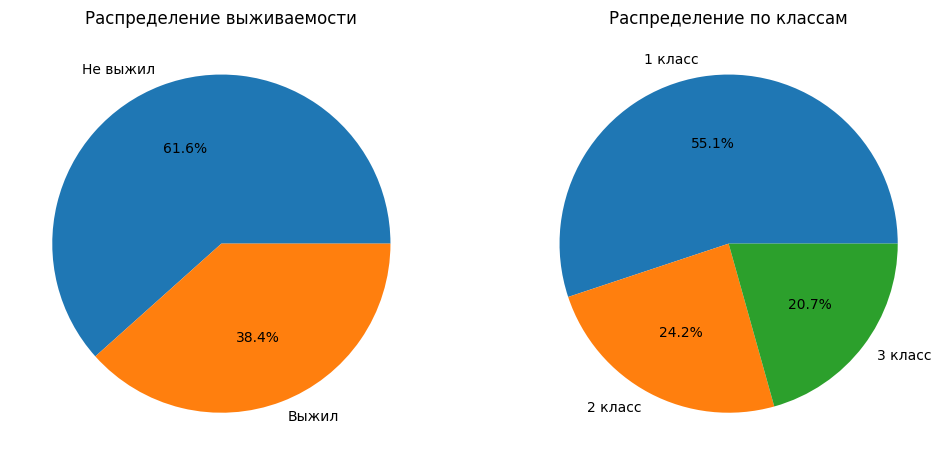

In [23]:
# 4. Pie chart для Survived и Pclass
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
survived_counts = df['Survived'].value_counts()
plt.pie(survived_counts, labels=['Не выжил', 'Выжил'], autopct='%.1f%%')
plt.title('Распределение выживаемости')

plt.subplot(1, 2, 2)
pclass_counts = df['Pclass'].value_counts()
plt.pie(pclass_counts, labels=['1 класс', '2 класс', '3 класс'], autopct='%.1f%%')
plt.title('Распределение по классам')

Text(0.5, 1.02, 'Pairplot числовых переменных')

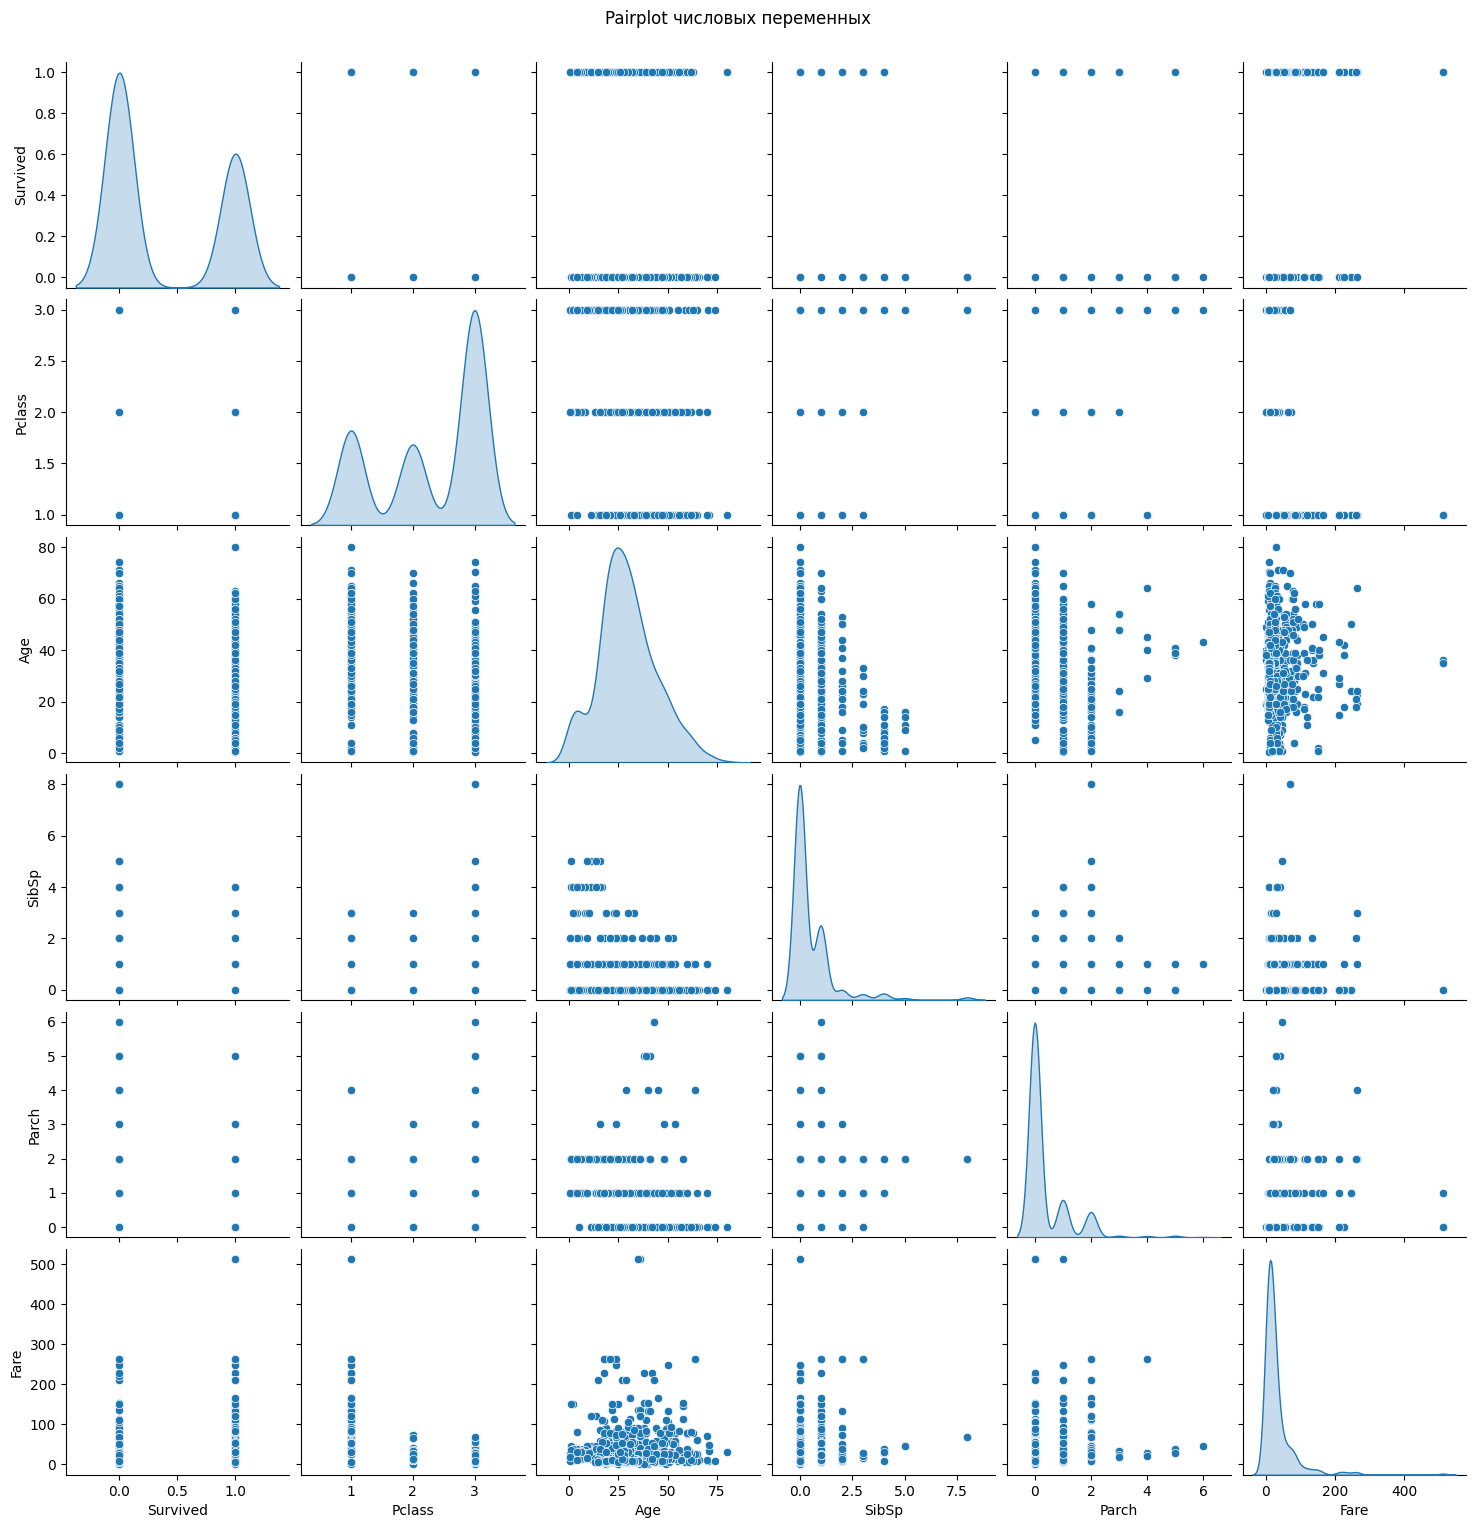

In [24]:
# 5. Pairplot для числовых переменных
numeric_columns = df.select_dtypes(include='number').columns
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.suptitle('Pairplot числовых переменных', y=1.02)

In [25]:
# 6. Sunburst plot с помощью Plotly
fig = px.sunburst(df,
                  path=['Pclass', 'Sex'],
                  color='Sex',
                  color_discrete_map={'male': '#1f77b4', 'female': '#ff7f0e'},
                  title='Распределение пассажиров по классам и полу')
fig.update_layout(margin=dict(l=0, r=0, t=40, b=0))
fig.show()